# Data Collection & EDA

Notebook outlining the steps taken to collect data from our subreddits and EDA performed.

> **Data Science Problems**<br> 
1) Given the text contained within the title and original post from r/woodworking and r/mtb can we predict which subreddit the post came from with >85% accuracy?<br> 
2) Further, using the same model and hyperparameters can we achieve >80% accuracy using the two similar subreddits r/mtb and r/bicycling?

## Contents
- [Imports](#Imports)
- [Data Collection](#Data-Collection)
- [Cleaning & Feature Engineering](#Cleaning-&-Feature-Engineering)
- [Top Tokens](#Top-Tokens)
- [Extra Data Collection for Question 2](#Extra-Data-Collection-for-Question-2)

### Imports

In [51]:
import requests
import pandas as pd
import numpy as np

### Data Collection

In [44]:
# thanks shiruken
# https://www.reddit.com/r/pushshift/comments/bfc2m1/capping_at_1000_posts/
# Get from r/woodworking
n = 0
last = ''
posts = []
url = 'https://api.pushshift.io/reddit/search/submission/?subreddit=woodworking'

while n < 10000:
    request = requests.get('{}&before={}'.format(url,last))
    json = request.json()
    for s in json['data']:
        posts.append(s)
        n += 1
    last = int(s['created_utc'])

In [45]:
# convert to dataframe
wood_df = pd.DataFrame(posts)

In [103]:
wood_df[['title','selftext','subreddit']].head()

,title,selftext,subreddit
0,Is it a bad idea to apply oil based polyuretha...,What are your experiences,woodworking
1,First project: a needlessly complicated learni...,,woodworking
2,"Welded this 2x2 steel tube TV console table, u...",,woodworking
3,Router means: Marble Run! Making toys for my S...,,woodworking
4,structural feasability,"Hey everyone, need some design advice from fol...",woodworking


In [104]:
# only get our title, text and subreddit fields
wood_df = wood_df[['title','selftext','subreddit']]

title        0
selftext     3
subreddit    0
dtype: int64

In [49]:
# thanks shiruken
# https://www.reddit.com/r/pushshift/comments/bfc2m1/capping_at_1000_posts/
# Get from r/mtb
n = 0
last = ''
posts = []
url = 'https://api.pushshift.io/reddit/search/submission/?subreddit=mtb'

while n < 10000:
    request = requests.get('{}&before={}'.format(url,last))
    json = request.json()
    for s in json['data']:
        posts.append(s)
        n += 1
    last = int(s['created_utc'])

In [50]:
# convert to dataframe
mtb_df = pd.DataFrame(posts)

In [59]:
mtb_df[['title','selftext','subreddit']].head()

,title,selftext,subreddit
0,I went to a free taco day and there happened t...,,MTB
1,2019 Trek Fuel EX8 vs 2020 Orbea Occam H30,A friend of mine is looking at these two bikes...,MTB
2,Flangless seals on fox forks,I'm planning on doing a seal replacement on my...,MTB
3,Forming the flying V to push our hurt friend o...,,MTB
4,A Pisgah trail that's not wrecked from freeze-...,,MTB


In [105]:
# only get our title, text and subreddit fields
mtb_df = mtb_df[['title','selftext','subreddit']]

### Cleaning & Feature Engineering

In [106]:
# Concatenate dataframes
df = pd.concat([wood_df,mtb_df])

In [107]:
# Did it work?
df.shape

(20000, 3)

In [108]:
df['subreddit'].value_counts()

woodworking    10000
MTB            10000
Name: subreddit, dtype: int64

We have successfully created our combined DataFrame with 20,000 observations and equal classes.

In both subbreddits there are numerous posts that only have a title and then pictures. Let's create a new 'text' column that includes both the title and selftext so that we have a single column with that includes text for every instance.

In [109]:
df['text'] = df['title'] + ' ' + df['selftext']

In [110]:
df.head()

,title,selftext,subreddit,text
0,Is it a bad idea to apply oil based polyuretha...,What are your experiences,woodworking,Is it a bad idea to apply oil based polyuretha...
1,First project: a needlessly complicated learni...,,woodworking,First project: a needlessly complicated learni...
2,"Welded this 2x2 steel tube TV console table, u...",,woodworking,"Welded this 2x2 steel tube TV console table, u..."
3,Router means: Marble Run! Making toys for my S...,,woodworking,Router means: Marble Run! Making toys for my S...
4,structural feasability,"Hey everyone, need some design advice from fol...",woodworking,"structural feasability Hey everyone, need some..."


In [111]:
# convert subbreddit to boolean MTB = 0
df['subreddit'] = df['subreddit'].map({'woodworking':1,'MTB':0})
df.head()

,title,selftext,subreddit,text
0,Is it a bad idea to apply oil based polyuretha...,What are your experiences,1,Is it a bad idea to apply oil based polyuretha...
1,First project: a needlessly complicated learni...,,1,First project: a needlessly complicated learni...
2,"Welded this 2x2 steel tube TV console table, u...",,1,"Welded this 2x2 steel tube TV console table, u..."
3,Router means: Marble Run! Making toys for my S...,,1,Router means: Marble Run! Making toys for my S...
4,structural feasability,"Hey everyone, need some design advice from fol...",1,"structural feasability Hey everyone, need some..."


In [112]:
# Mean + median text length 
print('Mean characters in text: ' + str(round(df['text'].str.len().mean(),2)))
print('Median characters in text: ' + str(round(df['text'].str.len().median(),2)))

Mean characters in text: 235.5
Median characters in text: 97.0


In [113]:
# For woodworking
print('Mean characters in text, woodworking subreddit: ' + str(round(df.loc[df['subreddit'] == 1]['text'].str.len().mean(),2)))
print('Median characters in text, woodworking subreddit: ' + str(round(df.loc[df['subreddit'] == 1]['text'].str.len().median(),2)))

Mean characters in text, woodworking subreddit: 193.4
Median characters in text, woodworking subreddit: 88.0


In [114]:
# For mtb
print('Mean characters in text, mtb subreddit: ' + str(round(df.loc[df['subreddit'] == 0]['text'].str.len().mean(),2)))
print('Median characters in text, mtb subreddit: ' + str(round(df.loc[df['subreddit'] == 0]['text'].str.len().median(),2)))

Mean characters in text, mtb subreddit: 277.61
Median characters in text, mtb subreddit: 113.0


We have done the feature engineering we want and also it was interesting to note that the woodworking subreddit had lower average and median string lengths than the mtb subreddit. We will now save our data to CSV and move on to modelling.

In [115]:
# save to csv
df.to_csv('../data/subreddit_text.csv', index=False)

### Top Tokens

In [198]:
# visualization imports
from sklearn.feature_extraction.text import CountVectorizer
import seaborn as sns
import matplotlib.pyplot as plt

We are going to look at the top words and frequencies for our 2 main subreddits to compare what tokens appear most often.

In [207]:
# Get top words method from 
# https://www.kdnuggets.com/2019/05/complete-exploratory-data-analysis-visualization-text-data.html
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer(stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

In [217]:
# Top 10 woodworking words (no stop words)
top_wood = get_top_n_words(df[df['subreddit']==1]['text'],10)
top_wood = dict(top_wood)
top_wood

{'wood': 2265,
 'table': 1789,
 'just': 1316,
 'amp': 1291,
 'like': 1172,
 'https': 1051,
 'make': 1039,
 'saw': 1028,
 'woodworking': 927,
 've': 909}

In [222]:
# Top 10 mtb words (no stop words)
top_mtb = get_top_n_words(df[df['subreddit']==0]['text'],10)
top_mtb = dict(top_mtb)
top_mtb

{'bike': 6084,
 'new': 2244,
 'just': 2113,
 'like': 1946,
 'ride': 1772,
 'looking': 1702,
 'riding': 1603,
 'trail': 1522,
 've': 1496,
 'mtb': 1415}

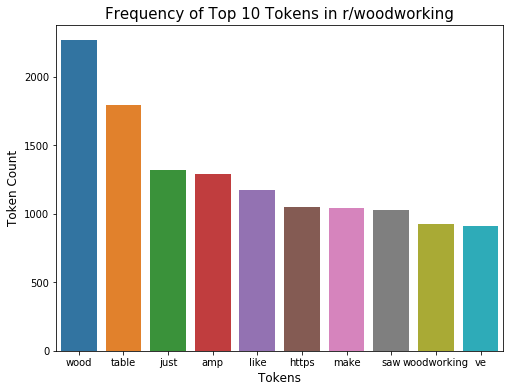

In [226]:
# barplot of top 10 woodworking tokens
plt.figure(figsize=(8,6))
sns.barplot(x=list(top_wood.keys()),y=list(top_wood.values()))
plt.title('Frequency of Top 10 Tokens in r/woodworking',fontsize=15)
plt.xlabel('Tokens',fontsize=12)
plt.ylabel('Token Count',fontsize=12);

We can see that about half of these seem to be clearly woodworking related:
- wood
- table
- make
- saw
- woodworking

They will likely be very good predictors. However, using sklean's 'english' stop words still left us with tokens such as 'just', 'like' and we also have 'amp' we may be related to electric supply, https and ve which we don't know much about.

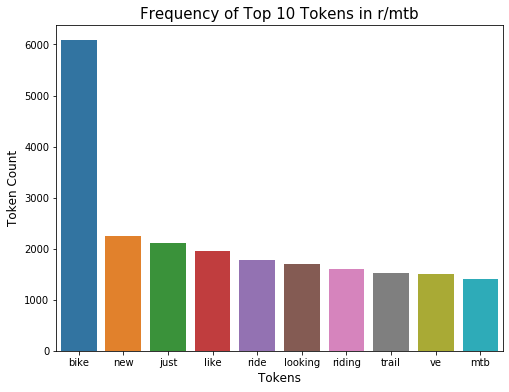

In [227]:
# barplot of top 10 mtb tokens
plt.figure(figsize=(8,6))
sns.barplot(x=list(top_mtb.keys()),y=list(top_mtb.values()))
plt.title('Frequency of Top 10 Tokens in r/mtb',fontsize=15)
plt.xlabel('Tokens',fontsize=12)
plt.ylabel('Token Count',fontsize=12);

Once again we have the tokens 'like', 'just' and 've' but the other tokens seem to be very good indicators for r/mtb.  It is also interesting to note that we have over 6,000 observations of 'bike' while for r/woodworking there was only ~2,300 observations of 'wood' and overally there seem to be more observations of all the tokens in the top 10 for r/mtb.

### Extra Data Collection for Question 2

In [92]:
# thanks shiruken
# https://www.reddit.com/r/pushshift/comments/bfc2m1/capping_at_1000_posts/
# Get from r/roadcycling so that we can see our models performance with
# 2 similar subreddits (mtb and rbicycling)
n = 0
last = ''
posts = []
url = 'https://api.pushshift.io/reddit/search/submission/?subreddit=bicycling'

while n < 10000:
    request = requests.get('{}&before={}'.format(url,last))
    json = request.json()
    for s in json['data']:
        posts.append(s)
        n += 1
    last = int(s['created_utc'])

In [117]:
# convert to dataframe
b_df = pd.DataFrame(posts)
# only get our title, text and subreddit fields
b_df = b_df[['title','selftext','subreddit']]
# Create 'Similar' datafram 
df_sim = pd.concat([b_df,mtb_df])
# Create 'text' column
df_sim['text'] = df_sim['title'] + ' ' + df_sim['selftext']
# Check
df_sim.head()

,title,selftext,subreddit,text
0,Anyone done the Mt. Washington Century in New ...,,bicycling,Anyone done the Mt. Washington Century in New ...
1,Built Up A 90s Cannondale Super V with SRAM NX...,,bicycling,Built Up A 90s Cannondale Super V with SRAM NX...
2,[NBD] New bike for collegiate road racing!,,bicycling,[NBD] New bike for collegiate road racing!
3,Best hybrid commuter bike for under £1000?,Recently had my Cube SL stolen and looking to ...,bicycling,Best hybrid commuter bike for under £1000? Rec...
4,NBD Post,My first new(ish) bike as a college student! I...,bicycling,NBD Post My first new(ish) bike as a college s...


In [118]:
# Boolean for 'subreddit', MTB = 0
df_sim['subreddit'] = df_sim['subreddit'].map({'bicycling':1,'MTB':0})
df_sim.head()

,title,selftext,subreddit,text
0,Anyone done the Mt. Washington Century in New ...,,1,Anyone done the Mt. Washington Century in New ...
1,Built Up A 90s Cannondale Super V with SRAM NX...,,1,Built Up A 90s Cannondale Super V with SRAM NX...
2,[NBD] New bike for collegiate road racing!,,1,[NBD] New bike for collegiate road racing!
3,Best hybrid commuter bike for under £1000?,Recently had my Cube SL stolen and looking to ...,1,Best hybrid commuter bike for under £1000? Rec...
4,NBD Post,My first new(ish) bike as a college student! I...,1,NBD Post My first new(ish) bike as a college s...


In [119]:
# save to csv
df_sim.to_csv('../data/similar_subreddits.csv', index=False)

In [120]:
# Mean and median string length r/bicycling
print('Mean characters in text, bicycling subreddit: ' + str(round(df_sim.loc[df['subreddit'] == 1]['text'].str.len().mean(),2)))
print('Median characters in text, bicycling subreddit: ' + str(round(df_sim.loc[df['subreddit'] == 1]['text'].str.len().median(),2)))

Mean characters in text, bicycling subreddit: 249.79
Median characters in text, bicycling subreddit: 84.0
